Source 1: https://hackernoon.com/linear-programming-in-python-a-straight-forward-tutorial-a0d152618121

Cost of computer model = 500&#36;

+ Factory f0: 2000 per day at 450&#36; per unit
+ Factory f1: 1500 per day at 420&#36; per unit
+ Factory f2: 1000 per day at 400&#36; per unit

Goal: 1 month to assemble 80 000 units

Constraint: no factory is to produce more than double the units than any other factory

Question: find optimal production allocation between the factories which maximizes the profit obtained from selling the computers under constraints

In [1]:
from pulp import *
import pandas as pd

problem = LpProblem('Production units allocation', LpMaximize)

# factory cost per day
cf0 = 450
cf1 = 420
cf2 = 400

# number of units per day
f0 = 2000
f1 = 1500
f2 = 1000

# total units
goal = 80000

# time limit
max_num_days = 30

num_factories = 3

# decision variable - number of days spent producing for each factory
factory_days = LpVariable.dicts('factoryDays', list(range(num_factories)), 0, 30, cat='Continuous')
display(factory_days)

# goal constraint
c1 = factory_days[0] * f1 + factory_days[1] * f1 + factory_days[2] * f2 >= goal

# production constraints
c2 = factory_days[0]*f0 <= 2*factory_days[1]*f1
c3 = factory_days[0]*f0 <= 2*factory_days[2]*f2
c4 = factory_days[1]*f1 <= 2*factory_days[2]*f2
c5 = factory_days[1]*f1 <= 2*factory_days[0]*f0
c6 = factory_days[2]*f2 <= 2*factory_days[1]*f1
c7 = factory_days[2]*f2 <= 2*factory_days[0]*f0

for c in [c1, c2, c3, c4, c5, c6, c7]:
    problem += c
    
# objective function - minimizing the cost of assembling all of those computers
# ~ maximizing the negative cost

problem += -factory_days[0]*cf0*f0 - factory_days[1]*cf1*f1 - factory_days[2]*cf2*f2

display(problem)

{0: factoryDays_0, 1: factoryDays_1, 2: factoryDays_2}

Production units allocation:
MAXIMIZE
-900000*factoryDays_0 + -630000*factoryDays_1 + -400000*factoryDays_2 + 0
SUBJECT TO
_C1: 1500 factoryDays_0 + 1500 factoryDays_1 + 1000 factoryDays_2 >= 80000

_C2: 2000 factoryDays_0 - 3000 factoryDays_1 <= 0

_C3: 2000 factoryDays_0 - 2000 factoryDays_2 <= 0

_C4: 1500 factoryDays_1 - 2000 factoryDays_2 <= 0

_C5: - 4000 factoryDays_0 + 1500 factoryDays_1 <= 0

_C6: - 3000 factoryDays_1 + 1000 factoryDays_2 <= 0

_C7: - 4000 factoryDays_0 + 1000 factoryDays_2 <= 0

VARIABLES
factoryDays_0 <= 30 Continuous
factoryDays_1 <= 30 Continuous
factoryDays_2 <= 30 Continuous

In [2]:
problem.solve()
# 1 - solvable

print(LpStatus[problem.solve()])

# Results - optimal number of days for each factory 
for i in range(3):
    print(f"Factory {i}: {factory_days[i].varValue}")
    
# print(value(problem.objective))

Optimal
Factory 0: 9.0909091
Factory 1: 24.242424
Factory 2: 30.0


Source 2: https://bit.ly/2MwMW3C

**Objective Function:** The main aim of the problem, either to maximize of to minimize, is the objective function of linear programming.

**Decision Variables:** The variables used to decide the output as decision variables. They are the unknowns of the mathematical programming model.

**Constraints:** These are the restrictions on the decision variables.

**Non – negativity restrictions:** In linear programming, the values for decision variables are always greater than or equal to 0.

In [3]:
# Defining a problem
problem = LpProblem('Problem', LpMinimize)

# Define decision variables
x = LpVariable('x', lowBound=0)
y = LpVariable('y', lowBound=0)

# Define objective function to minimize
problem += 3 * x + 5 * y

# Decision variable limitations
problem += 2 * x + 3 * y >= 12
problem += -x + y <= 3
problem += x >= 4
problem += y <= 3

display(problem)

Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

In [4]:
status = problem.solve()
display(LpStatus[status])

print(f'x: {value(x)}, y: {value(y)}\nMinimum of objective function: {value(problem.objective)}')

'Optimal'

x: 6.0, y: 0.0
Minimum of objective function: 18.0


Source: https://itnext.io/introduction-to-linear-programming-with-python-1068778600ae

Decision Variables:
+ x - units of Medisine 1
+ y - units of Medisine 2

Objective: 25 * x + 10 * y (max)

Constraints:
+ Herb A : 3 * x + 4 * y <=25
+ Herb B : 2 * x + y <= 10

Non-neg.:
+ x >= 0
+ y >= 0

In [5]:
problem = LpProblem("Medicine", LpMaximize)

# Decision variables
x = LpVariable('Medicine 1 units', 0, None, LpInteger)
y = LpVariable('Medicine 2 units', 0, None, LpInteger)

# Objective
problem += 25 * x + 20 * y, 'Health restored; to be maximized'

# Constraints
problem += 3 * x + 4 * y <= 25, 'Herb A constraint'
problem += 2 * x + y <= 10, 'Herb B constraint'

# Write problem data to Lp file
problem.writeLP('Medicine.lp')

status = problem.solve()
print(f'Status: {LpStatus[status]}')

for var in problem.variables():
    print(var.name, '=', var.varValue)
    
# Optimized objective
print(f'Maximum health can be restored: {value(problem.objective)}')

Status: Optimal
Medicine_1_units = 3.0
Medicine_2_units = 4.0
Maximum health can be restored: 155.0


In [6]:
# https://towardsdatascience.com/linear-programming-and-discrete-optimization-with-python-using-pulp-449f3c5f6e99

problem = LpProblem('Diet Problem', LpMinimize)

df = pd.read_excel('data/diet - medium.xls', nrows=17)
display(df.head())

,Foods,Price/Serving,Serving Size,Calories,Cholesterol (mg),Total_Fat (g),Sodium (mg),Carbohydrates (g),Dietary_Fiber (g),Protein (g),Vit_A (IU),Vit_C (IU),Calcium (mg),Iron (mg)
0,Frozen Broccoli,0.48,10 Oz Pkg,73.8,0.0,0.8,68.2,13.6,8.5,8.0,5867.4,160.2,159.0,2.3
1,Frozen Corn,0.54,1/2 Cup,72.2,0.0,0.6,2.5,17.1,2.0,2.5,106.6,5.2,3.3,0.3
2,Raw Lettuce Iceberg,0.06,1 Leaf,2.6,0.0,0.0,1.8,0.4,0.3,0.2,66.0,0.8,3.8,0.1
3,Baked Potatoes,0.18,1/2 Cup,171.5,0.0,0.2,15.2,39.9,3.2,3.7,0.0,15.6,22.7,4.3
4,Tofu,0.93,1/4 block,88.2,0.0,5.5,8.1,2.2,1.4,9.4,98.6,0.1,121.8,6.2


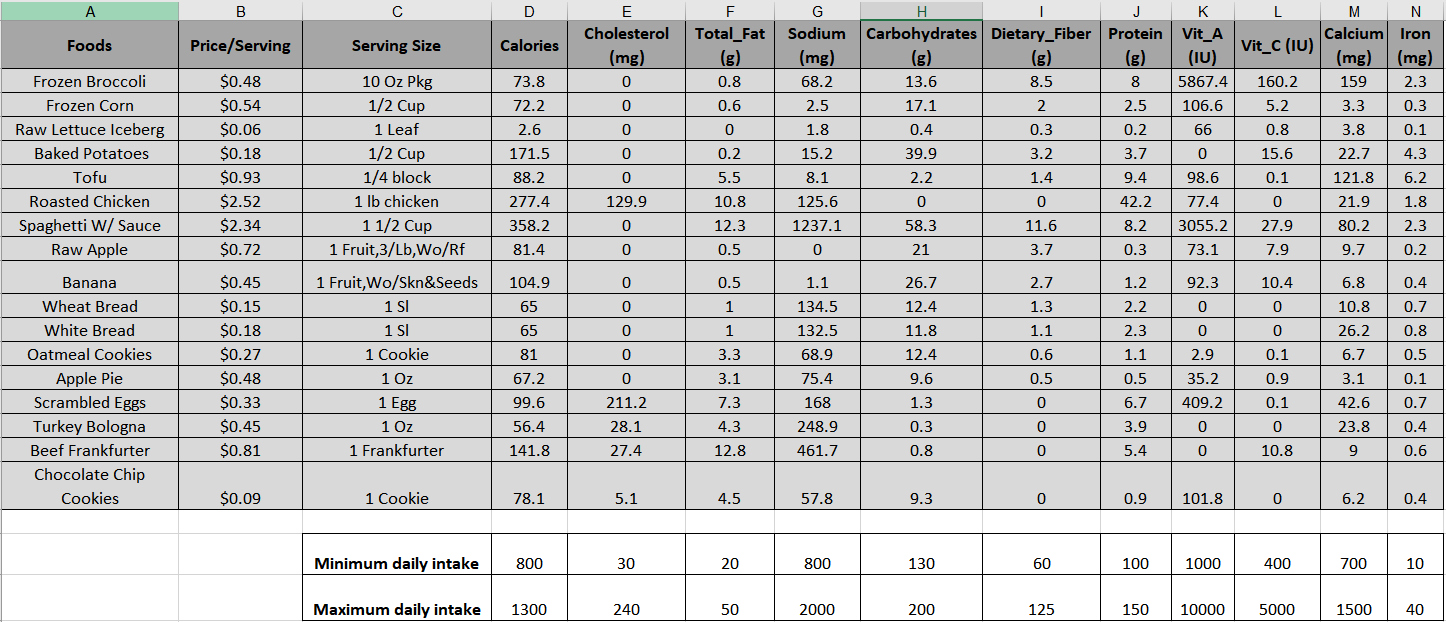

In [7]:
# list of food items
food_items = list(df['Foods'])

# Dict food item: cost
costs = dict(zip(food_items, df['Price/Serving']))
for k, v in list(costs.items())[:3]:
    print(k, ':', v)
    
# Dict food item : calories
calories = dict(zip(food_items, df['Calories']))

fat = dict(zip(food_items, df['Total_Fat (g)']))

carbs = dict(zip(food_items, df['Carbohydrates (g)']))

protein = dict(zip(food_items, df['Protein (g)']))

fiber = dict(zip(food_items, df['Dietary_Fiber (g)']))

vitA = dict(zip(food_items, df['Vit_A (IU)']))

# Decision variables
food_vars = LpVariable.dicts('Food', food_items, lowBound=0, cat='Integer')

# Objective
problem += lpSum([costs[i]*food_vars[i] for i in food_items])

# Constrains
problem += lpSum([calories[f] * food_vars[f] for f in food_items]) >= 800.0
problem += lpSum([calories[f] * food_vars[f] for f in food_items]) <= 1300.0

# Fat
problem += lpSum([fat[f] * food_vars[f] for f in food_items]) >= 20.0, "FatMinimum"
problem += lpSum([fat[f] * food_vars[f] for f in food_items]) <= 50.0, "FatMaximum"

# Carbs
problem += lpSum([carbs[f] * food_vars[f] for f in food_items]) >= 130, "Carbs minimum"
problem += lpSum([carbs[f] * food_vars[f] for f in food_items]) <= 200, "Carbs maximum"

# Protein
problem += lpSum([protein[f] * food_vars[f] for f in food_items]) >= 100, "Protein minimum"
problem += lpSum([protein[f] * food_vars[f] for f in food_items]) >= 150, "Protein maximum"

# Fiber
#problem += lpSum([fiber[f] * food_vars[f] for f in food_items]) >= 60, "Fiber minimum"
#problem += lpSum([fiber[f] * food_vars[f] for f in food_items]) >= 125, "Fiber maximum"

# Vitamin A
problem += lpSum([vitA[f] * food_vars[f] for f in food_items]) >= 400, "vitA minimum"
problem += lpSum([vitA[f] * food_vars[f] for f in food_items]) >= 5000, "vitA maximum"

print(LpStatus[problem.solve()])

Frozen Broccoli : 0.48
Frozen Corn : 0.54
Raw Lettuce Iceberg : 0.06
Optimal


In [8]:
for var in problem.variables():
    if var.varValue > 0:
        print(var.name, '=', var.varValue)
        
# optimum?

Food_Chocolate_Chip_Cookies = 1.0
Food_Frozen_Broccoli = 8.0
Food_Roasted_Chicken = 2.0
Food_Wheat_Bread = 1.0


In [9]:
# Minimum of objective function
print(f'Minimum cost of diet: {value(problem.objective)}')

Minimum cost of diet: 9.12
